## Import necessary libraries

In [103]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import (KMeans,
                             AgglomerativeClustering)
from sklearn.metrics import (calinski_harabasz_score,
                             silhouette_score)
from scipy.cluster.hierarchy import (linkage,
                                     dendrogram)

## Read data

In [5]:
path = '../clustering.csv'
data = pd.read_csv(path, header=None)

## Data info

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 2 columns):
0    400 non-null float64
1    400 non-null float64
dtypes: float64(2)
memory usage: 6.3 KB


In [16]:
data.describe()

,0,1
count,400.000000,400.000000
mean,-0.580656,-8.010264
std,48.821210,62.096845
min,-107.433649,-128.983720
25%,-34.551495,-70.730416
50%,5.691010,-3.447565
75%,31.456507,45.822610
max,109.733409,99.935839


## Plot 2D

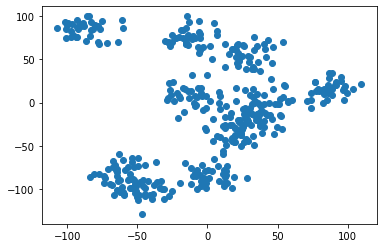

In [36]:
plt.scatter(data.iloc[:,0], data.iloc[:,1])
plt.show()

### Conclusions
We have more than two class, but it is hard to say how many (maybe 5?, maybe more?).

## Methods

### Kmeans + elbow method

#### Nedeed functions (laboratory)

In [80]:
def plot_kmeans_clusters(X, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(X)
    y_kmeans = kmeans.predict(X)
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_kmeans, s=30, cmap='viridis')

    centers = kmeans.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.75)
    plt.title('K-means clusters')
    plt.show()
    
def count_wcss_scores(X, k_max):
    scores = []
    for k in range(1, k_max+1):
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(X)
        wcss = kmeans.score(X) * -1
        scores.append(wcss)
    return scores

def count_clustering_scores(X, cluster_num, model, score_fun):
    if isinstance(cluster_num, int):
        cluster_num_iter = [cluster_num]
    else:
        cluster_num_iter = cluster_num
        
    scores = []    
    for k in cluster_num_iter:
        model_instance = model(n_clusters=k)
        labels = model_instance.fit_predict(X)
        wcss = score_fun(X, labels)
        scores.append(wcss)
    
    if isinstance(cluster_num, int):
        return scores[0]
    else:
        return scores
    

def plot_scores(scores):
    x_ticks = list(range(1, len(scores) + 1))
    plt.plot(x_ticks, scores, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Within-cluster sum of squares')
    plt.title('The Elbow Method showing the optimal k')
    plt.show()

#### Plot kmeans clusters

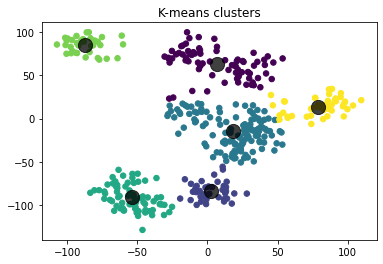

In [40]:
plot_kmeans_clusters(data, n_clusters=6)

#### Elbow method

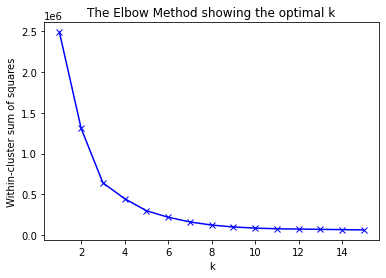

In [74]:
scores = count_wcss_scores(data, 15)
plot_scores(scores)

#### K-medoid method

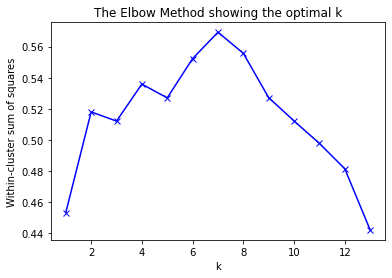

In [84]:
scores = count_clustering_scores(data, range(2, 15), KMeans, silhouette_score)
plot_scores(scores)

#### Conclusions
It is worth to check number of clusters: 7, 8, 9

In [61]:
def plot_part(X, from_number=0, to_number=10):
    for i in range(from_number, to_number + 1):
        print(f'Number of clusters: {i}')
        plot_kmeans_clusters(X, i)

Number of clusters: 7


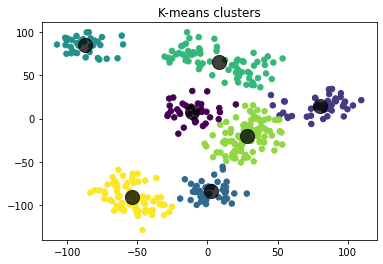

Number of clusters: 8


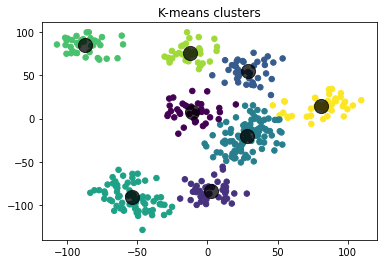

Number of clusters: 9


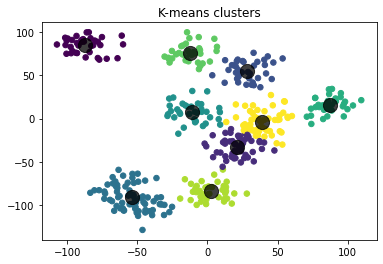

In [73]:
plot_part(data, 7, 9)

##### In my opinion the best number of clusters is 8!

### Agglomerative clustering + Silhouetta method

#### Needed functions (laboratory)

In [100]:
def plot_agglomerative_clusters(X, n_clusters):
    agglomerative = AgglomerativeClustering(n_clusters=n_clusters)

    y = agglomerative.fit_predict(X)
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=30, cmap='viridis')
    plt.show()
    

def plot_silhoutte(X, n_max_clusters):
    scores = []
    for i in range(2, n_max_clusters+1):
        agglomerative = AgglomerativeClustering(n_clusters=i)

        y = agglomerative.fit_predict(X)
        score = silhouette_score(X, y)
        
        scores.append(score)
        
    plt.plot(range(2, n_max_clusters+1), scores, 'o-')
    plt.show()



#### Plot agglomerative clusters

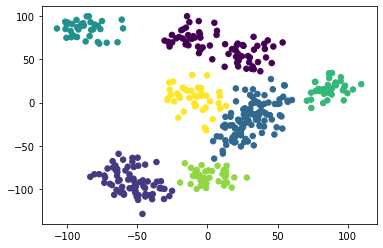

In [101]:
plot_agglomerative_clusters(data, 7)

#### Silhouetta method

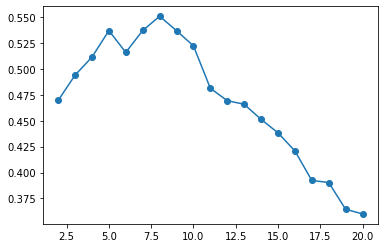

In [99]:
plot_silhoutte(data, n_max_clusters=20)

#### Conclusions
In the plot above we see, that number of clusters equals 8 is the best also in this method.

#### Dendrogram

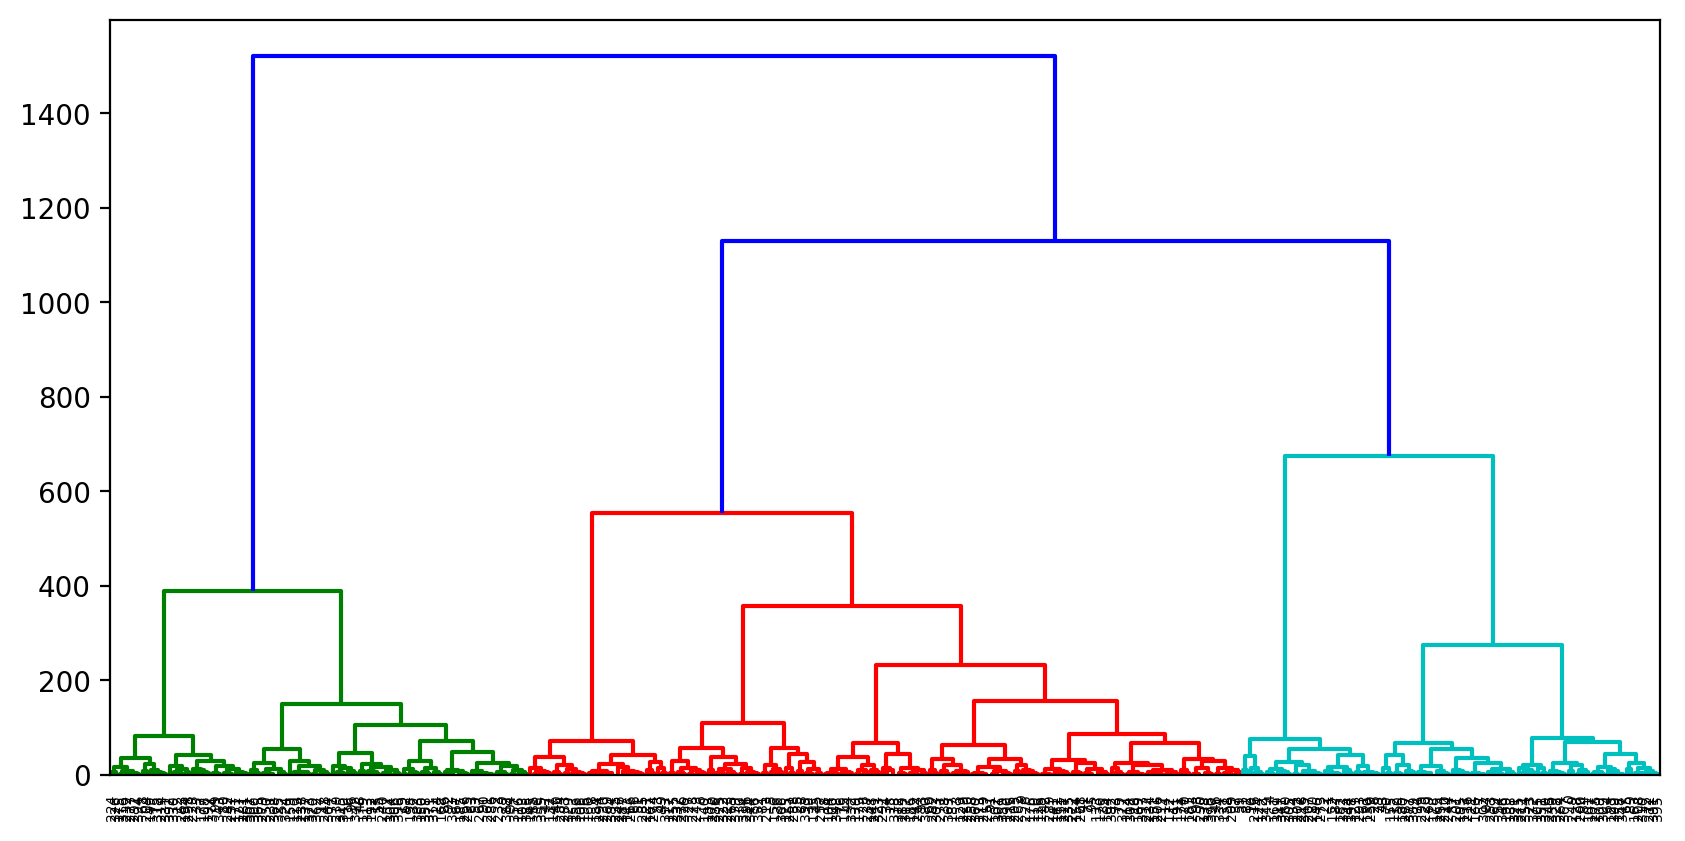

In [106]:
Z = linkage(data, method='ward')
plt.figure(figsize=(10, 5), dpi= 200, facecolor='w', edgecolor='k')
dendrogram(Z)
plt.show()

## Conclusion

The best number of clusters is 8. This is because this two algorithm and method shows that and you can see it on plots above!